# Covid 19 Analysis
- Author : Sanjana Singamsetty
- dataset: kaggle
 #### 7 steps involved in this project


1. Define the Problem
2. Data Collection
3. Data Preprocessing
4. Data Filtering
5. Grouping
6. Aggregation
7. Sorting 
8. Visualization

- for the filling unlike here u can also use fit_transform() from sklearn,preprocessing class is used to preprocessing data for model training fit() method calculates various required parameters and transform() method applies the calculated parameters to standardize the data the fit_transform() is used to fit the data into a model and transform it into a form that is more suitable for model in a single step.This saves our time and effort for calling both fill() and transform() separately




In [296]:
##importing libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
df=pd.read_csv('Covid Live.csv')
df

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,NaN,NaN,80,0,NaN,"49,322",NaN,NaN,NaN,"1,622"
226,227,Vatican City,29,NaN,NaN,29,0,NaN,"36,295",NaN,NaN,NaN,799
227,228,Tuvalu,20,NaN,NaN,NaN,20,NaN,"1,658",NaN,NaN,NaN,"12,066"
228,229,Western Sahara,10,1,NaN,9,0,NaN,16,2,NaN,NaN,"626,161"


In [258]:
##exploration starts here 
## to understand the data better see the top 5 rows 
df.head()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [259]:
##to know the shape that is no of rows and columns -- use shape function
df.shape##230 rows and 13 columns 

(230, 13)

In [260]:
## to know number of null values in the data set
nullvaluesrows= df.isnull().sum().sum()
nullvaluesrows   
##total of 389 values 

389

In [261]:
nullvalues=df.isnull().sum()
nullvalues

#                       0
Country,\nOther         0
Total\nCases            0
Total\nDeaths           5
New\nDeaths           227
Total\nRecovered       16
Active\nCases          15
Serious,\nCritical     83
Tot Cases/\n1M pop      2
Deaths/\n1M pop         7
Total\nTests           16
Tests/\n1M pop         16
Population              2
dtype: int64

In [262]:
def remove_commas(x):
    return x.replace(',', '')

# Remove commas from 'Total Deaths' values and convert to numeric type
df['Total\nDeaths']=df['Total\nDeaths'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df['Total\nDeaths'] = pd.to_numeric(df['Total\nDeaths'], errors='coerce', downcast='integer')



# Calculate the median of the 'total_deaths' column (excluding missing values)
totaldeathmedian = df['Total\nDeaths'].median()
df['Total\nDeaths']=df['Total\nDeaths'].fillna(totaldeathmedian)
df['Total\nDeaths'].isnull().sum()
##filled the total deaths column


0

In [263]:
## same way we are filling all the columns  using median
columns_to_fill = ['New\nDeaths', 'Total\nRecovered','Active\nCases' , 'Serious,\nCritical',
                   'Tot Cases/\n1M pop', 'Deaths/\n1M pop', 'Total\nTests','Tests/\n1M pop','Population']

# Remove commas from string values and convert columns to numeric
for col in columns_to_fill:
    df[col] = df[col].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

# Calculate the median for each column (excluding missing values)
medians = df[columns_to_fill].median()

# Fill missing values in each column with its corresponding median
df[columns_to_fill] = df[columns_to_fill].fillna(medians)
df

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904",1084282.0,9.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
1,2,India,"44,587,307",528629.0,9.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
2,3,France,"35,342,950",155078.0,9.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
3,4,Brazil,"34,706,757",686027.0,9.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
4,5,Germany,"33,312,373",149948.0,9.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,2179.0,9.0,80.0,0.0,18.0,49322.0,777.0,2.172044e+06,871741.5,1.622000e+03
226,227,Vatican City,29,2179.0,9.0,29.0,0.0,18.0,36295.0,777.0,2.172044e+06,871741.5,7.990000e+02
227,228,Tuvalu,20,2179.0,9.0,225011.0,20.0,18.0,1658.0,777.0,2.172044e+06,871741.5,1.206600e+04
228,229,Western Sahara,10,1.0,9.0,9.0,0.0,18.0,16.0,2.0,2.172044e+06,871741.5,6.261610e+05


In [264]:
df['Population'] = pd.to_numeric(df['Population'], errors='coerce', downcast='integer')
df['Population']

0      3.348053e+08
1      1.406632e+09
2      6.558452e+07
3      2.153536e+08
4      8.388360e+07
           ...     
225    1.622000e+03
226    7.990000e+02
227    1.206600e+04
228    6.261610e+05
229    5.816378e+06
Name: Population, Length: 230, dtype: float64

In [265]:
nullvalues=df.isnull().sum()
nullvalues

#                     0
Country,\nOther       0
Total\nCases          0
Total\nDeaths         0
New\nDeaths           0
Total\nRecovered      0
Active\nCases         0
Serious,\nCritical    0
Tot Cases/\n1M pop    0
Deaths/\n1M pop       0
Total\nTests          0
Tests/\n1M pop        0
Population            0
dtype: int64

In [266]:
df['Population'] = pd.to_numeric(df['Population'], errors='coerce', downcast='integer')
df

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904",1084282.0,9.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
1,2,India,"44,587,307",528629.0,9.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
2,3,France,"35,342,950",155078.0,9.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
3,4,Brazil,"34,706,757",686027.0,9.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
4,5,Germany,"33,312,373",149948.0,9.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,2179.0,9.0,80.0,0.0,18.0,49322.0,777.0,2.172044e+06,871741.5,1.622000e+03
226,227,Vatican City,29,2179.0,9.0,29.0,0.0,18.0,36295.0,777.0,2.172044e+06,871741.5,7.990000e+02
227,228,Tuvalu,20,2179.0,9.0,225011.0,20.0,18.0,1658.0,777.0,2.172044e+06,871741.5,1.206600e+04
228,229,Western Sahara,10,1.0,9.0,9.0,0.0,18.0,16.0,2.0,2.172044e+06,871741.5,6.261610e+05


## Now the data set has No Null values
- for data preprocessing we need to scale the data we know that we have 2 types of dcaling techniques 
- normalisation and standardisation 
- Standardization (Z-score normalization): In this method, each feature is scaled to have a mean of 0 and a standard deviation of. The formula for standardization is:

### z = (x - mean) / standard_deviation
- where x is the original value, mean is the mean of the feature, and standard_deviation is the standard deviation of the feature.


- Min-Max Scaling (Normalization): In this method, each feature is scaled to a specific range, usually between 0 and 1. The formula for min-max scaling is

### scaled_value = (x - min) / (max - min)

In [267]:
df.describe()

,#,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
count,230.000000,2.300000e+02,230.000000,2.300000e+02,2.300000e+02,230.000000,230.000000,230.000000,2.300000e+02,2.300000e+02,2.300000e+02
mean,115.500000,2.851300e+04,9.117391,2.627620e+06,5.378354e+04,179.204348,179085.795652,1185.156522,2.933894e+07,1.968860e+06,3.459377e+07
std,66.539462,1.011682e+05,2.213328,8.527212e+06,2.009570e+05,746.681337,181664.951320,1229.921910,1.106360e+08,3.379768e+06,1.383417e+08
min,1.000000,1.000000e+00,3.000000,2.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.091000e+03,7.990000e+02
25%,58.250000,2.160000e+02,9.000000,2.449950e+04,1.700000e+02,10.000000,17017.500000,174.250000,4.007550e+05,1.968250e+05,5.476582e+05
50%,115.500000,2.179000e+03,9.000000,2.250110e+05,1.246000e+03,18.000000,117976.000000,777.000000,2.172044e+06,8.717415e+05,5.816378e+06
75%,172.750000,1.327200e+04,9.000000,1.214962e+06,1.827425e+04,34.500000,292559.750000,1896.750000,1.130354e+07,2.072495e+06,2.197109e+07
max,230.000000,1.084282e+06,42.000000,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


In [268]:
df.columns
df.columns = ['Id', 'Country', 'TotalCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'SeriousCritical',
       'TotCases1Mpop', 'Deaths1Mpop', 'TotalTests',
       'Tests1Mpop', 'Population']
df = df.set_index('Id')
df
## changing the names of data columns 

,Country,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
Id,,,,,,,,,,,,
1,USA,"98,166,904",1084282.0,9.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
2,India,"44,587,307",528629.0,9.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
3,France,"35,342,950",155078.0,9.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
4,Brazil,"34,706,757",686027.0,9.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
5,Germany,"33,312,373",149948.0,9.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
226,Niue,80,2179.0,9.0,80.0,0.0,18.0,49322.0,777.0,2.172044e+06,871741.5,1.622000e+03
227,Vatican City,29,2179.0,9.0,29.0,0.0,18.0,36295.0,777.0,2.172044e+06,871741.5,7.990000e+02
228,Tuvalu,20,2179.0,9.0,225011.0,20.0,18.0,1658.0,777.0,2.172044e+06,871741.5,1.206600e+04


In [269]:
##remove the row with same data 
df= df.drop("NewDeaths" , axis=1)
df

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
Id,,,,,,,,,,,
1,USA,"98,166,904",1084282.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
2,India,"44,587,307",528629.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
3,France,"35,342,950",155078.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
4,Brazil,"34,706,757",686027.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
5,Germany,"33,312,373",149948.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07
...,...,...,...,...,...,...,...,...,...,...,...
226,Niue,80,2179.0,80.0,0.0,18.0,49322.0,777.0,2.172044e+06,871741.5,1.622000e+03
227,Vatican City,29,2179.0,29.0,0.0,18.0,36295.0,777.0,2.172044e+06,871741.5,7.990000e+02
228,Tuvalu,20,2179.0,225011.0,20.0,18.0,1658.0,777.0,2.172044e+06,871741.5,1.206600e+04


In [270]:
df.isnull().sum()

Country            0
TotalCases         0
TotalDeaths        0
TotalRecovered     0
ActiveCases        0
SeriousCritical    0
TotCases1Mpop      0
Deaths1Mpop        0
TotalTests         0
Tests1Mpop         0
Population         0
dtype: int64

### Gouping data  and aggregation together of each group 
- breaking the data set into parts  using groupby functions
- i have perfotmed meaning ful grouping below

In [271]:
grouped_by_country = df.groupby('Country')
grouped_by_death=df.groupby('TotalDeaths')

In [272]:

grouped_by_death1=grouped_by_death['TotalCases'].sum()
print(grouped_by_death1)

TotalDeaths
1.0          6,3894,6113,18810
2.0                          9
6.0              5,4605,285793
7.0                        761
8.0                      1,396
                   ...        
330065.0             7,084,488
387163.0            20,948,470
528629.0            44,587,307
686027.0            34,706,757
1084282.0           98,166,904
Name: TotalCases, Length: 210, dtype: object


In [273]:
df['TotalCases']=df['TotalCases'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df['TotalCases'] = pd.to_numeric(df['TotalCases'], errors='coerce', downcast='integer')

bins = [0, 100000, 500000, 1000000, 5000000, 10000000, float('inf')]
labels = ['0-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M']

df['TotalCasesRange'] = pd.cut(df['TotalCases'], bins=bins, labels=labels)
grouped_by_cases_range = df.groupby('TotalCasesRange')
print(grouped_by_cases_range)

In [274]:
grouped_by_cases_range = df.groupby('TotalCasesRange')

# Calculate the sum of 'TotalDeaths' for each group
total_deaths_by_cases_range = grouped_by_cases_range['TotalDeaths'].sum()
total_deaths_by_cases_range_mean = grouped_by_cases_range['TotalDeaths'].mean()
total_deaths_by_cases_range_median = grouped_by_cases_range['TotalDeaths'].median()
total_active_by_cases_range = grouped_by_cases_range['ActiveCases'].sum()
print(total_active_by_cases_range)
print(total_deaths_by_cases_range_mean)
print(total_deaths_by_cases_range_median)

TotalCasesRange
0-100k        231722.0
100k-500k     381347.0
500k-1M       262548.0
1M-5M        1491602.0
5M-10M       2477070.0
10M          7525925.0
Name: ActiveCases, dtype: float64
TotalCasesRange
0-100k          534.850000
100k-500k      3710.200000
500k-1M        8799.476190
1M-5M         28553.318182
5M-10M       110038.454545
10M          264609.928571
Name: TotalDeaths, dtype: float64
TotalCasesRange
0-100k          172.0
100k-500k      3023.5
500k-1M        7118.0
1M-5M         18394.5
5M-10M       117539.0
10M          152513.0
Name: TotalDeaths, dtype: float64


In [275]:
grouped_by_cases_range.describe()

TotalCases                                          \
                     count          mean           std         min   
TotalCasesRange                                                      
0-100k               100.0  2.881335e+04  2.656210e+04         9.0   
100k-500k             40.0  2.570276e+05  1.094685e+05    102546.0   
500k-1M               21.0  7.367798e+05  1.762592e+05    506991.0   
1M-5M                 44.0  2.469371e+06  1.389226e+06   1003778.0   
5M-10M                11.0  6.726789e+06  1.401223e+06   5118512.0   
10M                   14.0  2.936364e+07  2.215657e+07  10209239.0   

                                                                  TotalDeaths  \
                         25%         50%          75%         max       count   
TotalCasesRange                                                                 
0-100k               7908.50     18322.5     43434.75     93974.0       100.0   
100k-500k          179296.75    228228.0    332512.50    493563.0        40.0   
500k-1M            601869.00    670763.0    929051.00    999712.0        21.0   
1M-5M             1256286.00   1811955.5   4035153.50   4920192.0        44.0   
5M-10M            5890155.50   6417941.0   7316404.00   9708420.0        11.0   
10M              17892462.25  23027377.5  34358161.00  98166904.0        14.0   

                                ...  Tests1Mpop             Population  \
                          mean  ...         75%         max      count   
TotalCasesRange                 ...                                      
0-100k              534.850000  ...  1905000.25  16243126.0      100.0   
100k-500k          3710.200000  ...  1650084.50   6853194.0       40.0   
500k-1M            8799.476190  ...  1749083.00   7879860.0       21.0   
1M-5M             28553.318182  ...  2534572.25  22004939.0       44.0   
5M-10M           110038.454545  ...  1157338.50  21787811.0       11.0   
10M              264609.928571  ...  3904445.25  10082298.0       14.0   

                                                                     \
                         mean           std         min         25%   
TotalCasesRange                                                       
0-100k           6.228538e+06  1.370884e+07       799.0     59286.0   
100k-500k        5.675242e+07  2.290899e+08    288023.0   1281954.0   
500k-1M          1.688911e+07  2.488684e+07   1223387.0   3496016.0   
1M-5M            2.632769e+07  4.388800e+07   2078034.0   5916397.0   
5M-10M           6.686203e+07  7.909565e+07   9066710.0  20550021.0   
10M              2.010745e+08  3.563008e+08  26068792.0  61593207.0   

                                                         
                        50%           75%           max  
TotalCasesRange                                          
0-100k             406353.0  5.816378e+06  9.524079e+07  
100k-500k         5937191.0  3.256895e+07  1.448471e+09  
500k-1M           7040745.0  2.157584e+07  1.061567e+08  
1M-5M            10308753.0  2.093532e+07  2.294890e+08  
5M-10M           43192122.0  6.876780e+07  2.791345e+08  
10M              84722786.0  1.407507e+08  1.406632e+09  

[6 rows x 80 columns]

## Sorting the data set using total number of cases 
- the top city will be having highest in cases
- Functions used sort_values()
- sorted the data based on total cases, Deaths,Population

In [276]:
df4 = df.sort_values(by='TotalCases', ascending=False)
df4
## so we can see the top city is USA AND least city is Ms zaandam

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population,TotalCasesRange
Id,,,,,,,,,,,,
1,USA,98166904,1084282.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08,10M
2,India,44587307,528629.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09,10M
3,France,35342950,155078.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07,10M
4,Brazil,34706757,686027.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08,10M
5,Germany,33312373,149948.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07,10M
...,...,...,...,...,...,...,...,...,...,...,...,...
226,Niue,80,2179.0,80.0,0.0,18.0,49322.0,777.0,2.172044e+06,871741.5,1.622000e+03,0-100k
227,Vatican City,29,2179.0,29.0,0.0,18.0,36295.0,777.0,2.172044e+06,871741.5,7.990000e+02,0-100k
228,Tuvalu,20,2179.0,225011.0,20.0,18.0,1658.0,777.0,2.172044e+06,871741.5,1.206600e+04,0-100k


In [277]:
df3 = df.sort_values(by='TotalCases', ascending=True)
df3

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population,TotalCasesRange
Id,,,,,,,,,,,,
230,MS Zaandam,9,2.0,7.0,0.0,18.0,117976.0,777.0,2.172044e+06,871741.5,5.816378e+06,0-100k
229,Western Sahara,10,1.0,9.0,0.0,18.0,16.0,2.0,2.172044e+06,871741.5,6.261610e+05,0-100k
228,Tuvalu,20,2179.0,225011.0,20.0,18.0,1658.0,777.0,2.172044e+06,871741.5,1.206600e+04,0-100k
227,Vatican City,29,2179.0,29.0,0.0,18.0,36295.0,777.0,2.172044e+06,871741.5,7.990000e+02,0-100k
226,Niue,80,2179.0,80.0,0.0,18.0,49322.0,777.0,2.172044e+06,871741.5,1.622000e+03,0-100k
...,...,...,...,...,...,...,...,...,...,...,...,...
5,Germany,33312373,149948.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07,10M
4,Brazil,34706757,686027.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08,10M
3,France,35342950,155078.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07,10M


- in the above the sorting is done in the revese of what we did in the previous case

In [278]:
df1 = df.sort_values(by='Population', ascending=False)
df1

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population,TotalCasesRange
Id,,,,,,,,,,,,
108,China,250449,5226.0,242254.0,2969.0,36.0,173.0,4.0,1.600000e+08,110461.0,1.448471e+09,100k-500k
2,India,44587307,528629.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09,10M
1,USA,98166904,1084282.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08,10M
19,Indonesia,6429767,158093.0,6253317.0,18357.0,2771.0,23035.0,566.0,1.086570e+08,389264.0,2.791345e+08,5M-10M
53,Pakistan,1572598,30616.0,1536924.0,5058.0,47.0,6853.0,133.0,3.047745e+07,132806.0,2.294890e+08,1M-5M
...,...,...,...,...,...,...,...,...,...,...,...,...
219,Saint Pierre Miquelon,3188,1.0,2449.0,738.0,1.0,553568.0,174.0,2.490200e+04,4324015.0,5.759000e+03,0-100k
221,Montserrat,1396,8.0,1353.0,35.0,18.0,281168.0,1611.0,1.757900e+04,3540584.0,4.965000e+03,0-100k
220,Falkland Islands,1886,2179.0,1886.0,0.0,18.0,532919.0,777.0,8.632000e+03,2439107.0,3.539000e+03,0-100k


In [279]:
df2 = df.sort_values(by='Deaths1Mpop', ascending=False)
df2

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population,TotalCasesRange
Id,,,,,,,,,,,,
34,Peru,4143085,216539.0,3914598.0,11948.0,147.0,122998.0,6429.0,35126382.0,1042815.0,3.368421e+07,1M-5M
58,Bulgaria,1258670,37714.0,1211397.0,9559.0,43.0,183892.0,5510.0,10559171.0,1542702.0,6.844597e+06,1M-5M
96,Bosnia and Herzegovina,398668,16136.0,376654.0,5878.0,18.0,122693.0,4966.0,1861041.0,572748.0,3.249317e+06,100k-500k
44,Hungary,2094142,47503.0,2014175.0,32464.0,18.0,217998.0,4945.0,11394556.0,1186160.0,9.606259e+06,1M-5M
98,North Macedonia,342775,9534.0,332806.0,435.0,18.0,164692.0,4581.0,2130257.0,1023520.0,2.081304e+06,100k-500k
...,...,...,...,...,...,...,...,...,...,...,...,...
223,Macao,793,6.0,787.0,0.0,18.0,1188.0,9.0,7850.0,11760.0,6.674900e+05,0-100k
108,China,250449,5226.0,242254.0,2969.0,36.0,173.0,4.0,160000000.0,110461.0,1.448471e+09,100k-500k
150,Burundi,50129,38.0,49559.0,532.0,18.0,3971.0,3.0,345742.0,27386.0,1.262484e+07,0-100k


In [280]:
df

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population,TotalCasesRange
Id,,,,,,,,,,,,
1,USA,98166904,1084282.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08,10M
2,India,44587307,528629.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09,10M
3,France,35342950,155078.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07,10M
4,Brazil,34706757,686027.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08,10M
5,Germany,33312373,149948.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07,10M
...,...,...,...,...,...,...,...,...,...,...,...,...
226,Niue,80,2179.0,80.0,0.0,18.0,49322.0,777.0,2.172044e+06,871741.5,1.622000e+03,0-100k
227,Vatican City,29,2179.0,29.0,0.0,18.0,36295.0,777.0,2.172044e+06,871741.5,7.990000e+02,0-100k
228,Tuvalu,20,2179.0,225011.0,20.0,18.0,1658.0,777.0,2.172044e+06,871741.5,1.206600e+04,0-100k


## Visualization
- I have made a pie chart for c2 countries like india and Usa for covid analysis that gives the covd stats

ValueError: 'label' must be of length 'x'

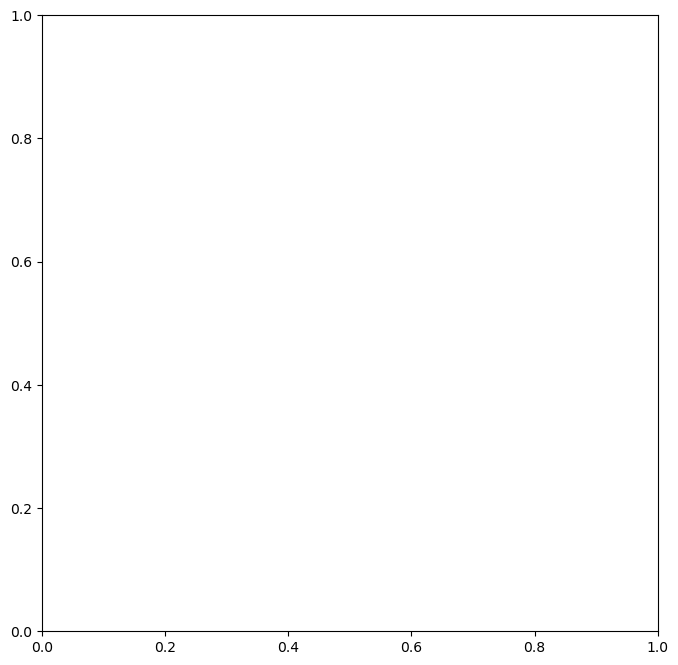

In [281]:


# Group the data by 'Country' and calculate the sum of 'TotalCases', 'TotalDeaths', and 'ActiveCases'
grouped_by_country = df.groupby('Country')
sum_total_cases = grouped_by_country['TotalCases'].sum()
sum_total_deaths = grouped_by_country['TotalDeaths'].sum()
sum_active_cases = grouped_by_country['ActiveCases'].sum()
sum_critical_cases = grouped_by_country['SeriousCritical'].sum()
# Create separate DataFrames for each attribute
total_cases_df = pd.DataFrame({'TotalCases': sum_total_cases})
total_deaths_df = pd.DataFrame({'TotalDeaths': sum_total_deaths})
active_cases_df = pd.DataFrame({'ActiveCases': sum_active_cases})


India_total_cases = sum_total_cases['India']
India_total_deaths = sum_total_deaths['India']
India_active_cases = sum_active_cases['India']
India_data = [India_total_cases, India_total_deaths, India_active_cases]
labels = ['Total Cases', 'Total Deaths', 'Active Cases']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(usa_data, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart: COVID-19 Data for India')
plt.show()

In [ ]:
# Extract data for the USA
usa_total_cases = sum_total_cases['USA']
usa_total_deaths = sum_total_deaths['USA']
usa_active_cases = sum_active_cases['USA']
usa_critical_cases = sum_critical_cases['USA']


# Data for the pie chart
usa_data = [usa_total_cases, usa_total_deaths, usa_active_cases,usa_critical_cases]
labels = ['Total Cases', 'Total Deaths', 'Active Cases','Critical Cases']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(usa_data, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart: COVID-19 Data for USA')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


france_data = df[df['Country'] == 'France']

france_total_cases = france_data['TotalCases'].sum()
france_total_deaths = france_data['TotalDeaths'].sum()
france_active_cases = france_data['ActiveCases'].sum()
france_total_recovered = france_data['TotalRecovered'].sum()

labels_hist = ['Total Cases', 'Total Deaths', 'Active Cases', 'Total Recovered']
france_data_hist = [france_total_cases, france_total_deaths, france_active_cases, france_total_recovered]


colors = ['blue', 'red', 'green', 'purple']


plt.figure(figsize=(10, 6))
plt.bar(labels_hist, france_data_hist, color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Chart: COVID-19 Data for France')
plt.show()


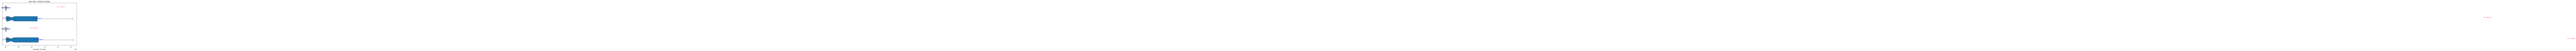

In [295]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the COVID-19 data in a DataFrame called 'df'

# Select the columns for the box plot
boxplot_columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']

# Create a box plot
plt.figure(figsize=(12, 6))  # Increase the figure size
plt.boxplot(df[boxplot_columns].values, labels=boxplot_columns, vert=False, notch=True, patch_artist=True, showfliers=False)

# Add labels and title
plt.xlabel('COVID-19 Cases')
plt.title('Box Plot: COVID-19 Data')

# Calculate quartiles and other statistics for each column
for col in boxplot_columns:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].median()
    Q3 = df[col].quantile(0.75)
    min_value = df[col].min()
    max_value = df[col].max()

    # Add quartile values as text annotations
    plt.text(Q1, boxplot_columns.index(col) + 1, f'Q1: {Q1}', ha='center', fontsize=10, color='blue')
    plt.text(Q2, boxplot_columns.index(col) + 1, f'Median: {Q2}', ha='center', fontsize=10, color='green')
    plt.text(Q3, boxplot_columns.index(col) + 1, f'Q3: {Q3}', ha='center', fontsize=10, color='blue')

    # Add minimum and maximum values as text annotations
    plt.text(min_value, boxplot_columns.index(col) + 1.1, f'Min: {min_value}', ha='center', fontsize=8, color='red')
    plt.text(max_value, boxplot_columns.index(col) + 1.1, f'Max: {max_value}', ha='center', fontsize=8, color='red')

# Adjust font size for better readability
plt.xticks(fontsize=10, rotation=45)  # Rotate the labels by 45 degrees
plt.yticks([])
plt.title('Box Plot: COVID-19 Data', fontsize=14)
plt.xlabel('Number of Cases', fontsize=12)

# Manually adjust the margins
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)

plt.show()


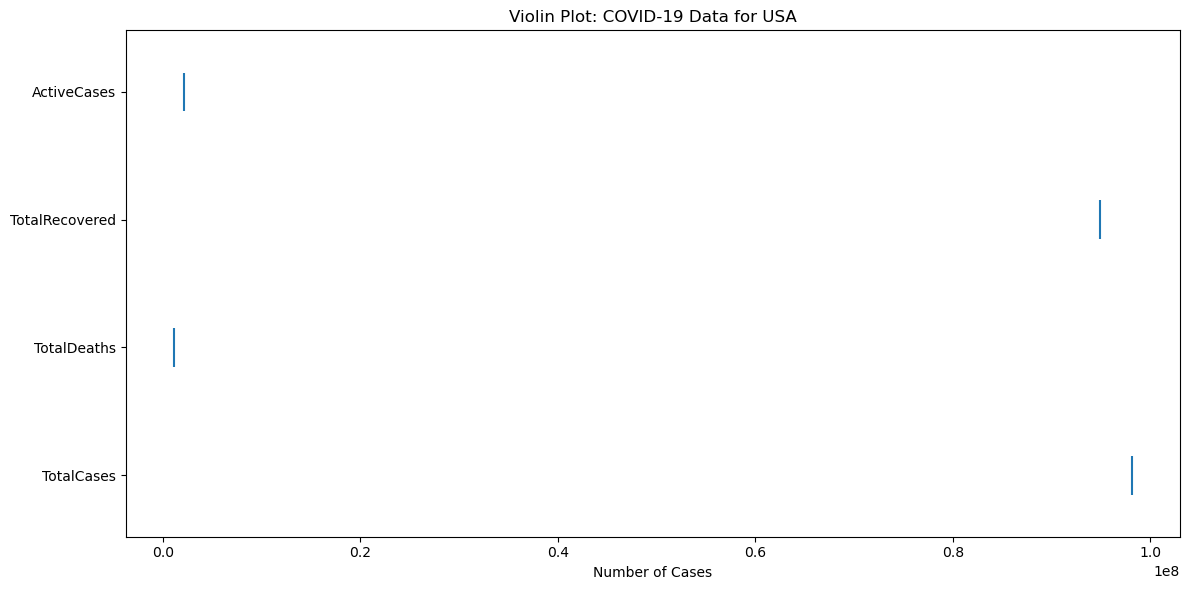

In [299]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the COVID-19 data in a DataFrame called 'df'

# Filter data for the country 'USA'
usa_data = df[df['Country'] == 'USA']

# Select the columns for the violin plot
violinplot_columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']

# Create a wide violin plot
plt.figure(figsize=(12, 6))  # Increase the figure size
plt.violinplot(usa_data[violinplot_columns].values, showmedians=True, showextrema=False, vert=False, widths=0.6, points=200)

# Add labels and title
plt.yticks(range(1, len(violinplot_columns) + 1), violinplot_columns)
plt.xlabel('Number of Cases')
plt.title('Violin Plot: COVID-19 Data for USA')

plt.tight_layout()
plt.show()
